In [2]:
# coding=utf8

import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [3]:
# 加载数据
df = pd.read_csv('data/DQC00-1d.txt',
                 sep=',',
                 nrows=500,
                 index_col=['datetime'],  # 设置行索引
                 parse_dates=['datetime'],  # 解析时间 20100104130500.0
                 date_parser=lambda x: pd.to_datetime(x, format='%Y%m%d%H%M%S.%f'),  # 时间解析的格式，进行毫秒级数据解析
                 usecols=['datetime', 'open', 'high', 'low', 'close', 'volume'],  # 设置需要用到的列
                 encoding='utf-8',
                 float_precision='round_trip',  # 所有数据会当做string读取, 使用时再进行相应的转换为float
                 )
# pd.reset_option('display.float_format')  # 重置
pd.set_option('precision', 2)  # 显示小数点后的位数
pd.set_option('display.max_rows', 300)  # 控制显示的最大行数
pd.set_option('display.min_rows', 20)  # 确定显示的部分有多少行
# pd.set_option('display.float_format',  '{:,.2f}'.format) # 数字格式化显示 用逗号格式化大值数字 设置数字精度
# 指定列名设置计算精确度，未指定的保持原样
df.round({'open':0, 'high':0, 'low':0, 'close':0 })
# 统一保持1位小数
df.round(0)
# 设置np输出精度
np.set_printoptions(precision=2)

In [4]:
print(df.dtypes)
df.head()

open      float64
high      float64
low       float64
close     float64
volume    float64
dtype: object


,open,high,low,close,volume
datetime,,,,,
2004-09-22,1143.23,1147.88,1106.05,1106.98,77908.0
2004-09-23,1097.68,1099.54,1089.32,1093.04,37196.0
2004-09-24,1082.81,1101.40,1082.81,1095.83,29367.0
2004-09-27,1092.11,1100.47,1075.38,1076.31,17336.0
2004-09-28,1077.24,1088.39,1077.24,1082.81,26681.0


In [5]:
# 2.1 缺失值处理

# 检查数据中是否有缺失值，以下两种方式均可
#Flase:对应特征的特征值中无缺失值
#True：有缺失值
print(df.isnull().any())
print(np.isnan(df).any())
#返回每一列缺失值统计个数
print(df.isnull().sum())

open      False
high      False
low       False
close     False
volume    False
dtype: bool
open      False
high      False
low       False
close     False
volume    False
dtype: bool
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [6]:
#缺失值处理，以下两种方式均可
#删除包含缺失值的行
df.dropna(inplace=True)
#缺失值填充
# df.fillna('100')

#返回每一列缺失值统计个数
df.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [7]:
# 2.2 确定特征值 目标值
# 特征值取开盘价
X = df.iloc[:, :1].values
print(X.shape)
print(X.ndim)
print(X[:3,])

(500, 1)
2
[[1143.23]
 [1097.68]
 [1082.81]]


In [8]:
# 目标值取收盘
# y = df.iloc[:, -2:-1].values.ravel()
y = df.iloc[:, -2:-1].values
print(y.shape)
print(y.ndim)
print(y[:3])


(500, 1)
2
[[1106.98]
 [1093.04]
 [1095.83]]


In [9]:
#将数据划分为训练集和验证集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
# 3. 特征工程（标准化）
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()

x_train_stand = standardScaler.fit_transform(X_train)
x_test_stand = standardScaler.transform(X_test)

y_train_stand = standardScaler.fit_transform(y_train)
y_test_stand = standardScaler.transform(y_test)

In [11]:
print(X_train.shape)
print(X_train.ndim)
print(y_train.shape)
print(y_train.ndim)


(375, 1)
2
(375, 1)
2


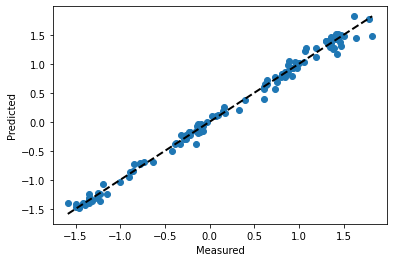

In [57]:
#画图观察
fig, ax = plt.subplots()
ax.scatter(y_test_stand, x_test_stand)
ax.plot([y_test_stand.min(), y_test_stand.max()], [y_test_stand.min(), y_test_stand.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [13]:
# 拟合回归模型
svr_rbf = SVR(kernel='rbf', C=100, gamma=1, epsilon=1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

In [14]:
svr = svr_poly

In [15]:
# 获取预测值
y_test_pred = svr.fit(x_train_stand[:300], y_train_stand[:300].ravel()).predict(x_test_stand)

In [16]:
# 获取这个估计器的参数
svr.get_params()

{'C': 100,
 'cache_size': 200,
 'coef0': 1,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'auto',
 'kernel': 'poly',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [17]:
# 返回预测的决定系数R^2
svr.score(x_test_stand, y_test_pred)

1.0

In [ ]:
y_test_pred = svr.fit(x_train_stand, y_train_stand.ravel()).predict(x_test_stand)

In [45]:
y_test_stand

array([[ 0.4 ],
       [ 1.64],
       [-1.32],
       [-1.34],
       [ 0.85],
       [ 0.81],
       [ 0.75],
       [-1.49],
       [-0.39],
       [-1.4 ],
       [ 0.61],
       [-0.13],
       [ 0.02],
       [-1.35],
       [ 0.61],
       [-0.13],
       [ 1.45],
       [-0.08],
       [ 0.08],
       [-0.07],
       [-0.03],
       [ 0.74],
       [ 0.64],
       [ 0.85],
       [-1.34],
       [ 0.89],
       [-1.42],
       [ 1.51],
       [-0.13],
       [-0.37],
       [-0.1 ],
       [ 0.61],
       [-0.86],
       [ 1.08],
       [ 1.3 ],
       [ 0.16],
       [-0.26],
       [-1.26],
       [ 1.78],
       [ 1.06],
       [ 0.99],
       [ 1.31],
       [ 0.92],
       [-0.74],
       [ 1.19],
       [ 1.82],
       [ 0.17],
       [ 1.47],
       [ 1.62],
       [-1.14],
       [-0.26],
       [-0.78],
       [-1.34],
       [ 1.38],
       [ 0.87],
       [-1.25],
       [ 1.35],
       [ 0.33],
       [-1.49],
       [ 1.06],
       [ 1.42],
       [-1.34],
       [

In [55]:
# figure number
fignum = 1
plt.figure(fignum, figsize=(4, 3))

# plt.scatter(np.arange(len(y_test_stand)), y_test_stand, s=5, c='blue')
# plt.scatter(y_test_pred, y_test_pred, s=5, c='r')

plt.show()

<Figure size 288x216 with 0 Axes>